In [1]:
import pandas as pd 

In [2]:
data=pd.read_csv("Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.drop("Id",axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
x=data.drop("Species",axis=1)
y=data["Species"]

In [6]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

F:\conda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
encode=LabelEncoder()

In [8]:
y1=encode.fit_transform(y)

In [9]:
Y=pd.get_dummies(y1).values

In [10]:
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,Y,test_size=0.2)

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
tree=DecisionTreeRegressor()

In [16]:
tree.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [17]:
pred=tree.predict(xtest)

In [24]:
new_data = [5.1,3.5,1.4,0.2]

In [25]:
new_data_scaled = scaler.fit_transform([new_data])

In [26]:
new_data_reshaped = new_data_scaled.reshape(1, -1)

In [29]:
prediction = tree.predict(new_data_reshaped)
predicted_class = prediction[0]
#iris_species = data["species"].unique()[predicted_class]  # Get species name from unique labels


In [32]:
print("Predicted class:", predicted_class)


Predicted class: [0. 1. 0.]


In [33]:
iris_species = data["species"].unique()[predicted_class]

KeyError: 'species'

In [53]:
from tensorflow.keras.models import Sequential

In [16]:
from tensorflow.keras.layers import Dense

In [54]:
model=Sequential()

In [66]:
model.add(Dense(10,activation="relu"))

In [67]:
model.add(Dense(3,activation="softmax"))

In [68]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
import tensorflow as tf 

In [31]:
call=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0003,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [69]:
model.fit(xtrain,ytrain,batch_size=100,epochs=100)

Epoch 1/100
2/2 [==============================] - 5s 15ms/step - loss: 1.0887 - accuracy: 0.3417
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 1.0860 - accuracy: 0.3417
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 1.0838 - accuracy: 0.3417
Epoch 4/100
2/2 [==============================] - 0s 18ms/step - loss: 1.0815 - accuracy: 0.3417
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 1.0792 - accuracy: 0.3417
Epoch 6/100
2/2 [==============================] - 0s 20ms/step - loss: 1.0769 - accuracy: 0.3417
Epoch 7/100
2/2 [==============================] - 0s 20ms/step - loss: 1.0744 - accuracy: 0.3417
Epoch 8/100
2/2 [==============================] - 0s 18ms/step - loss: 1.0722 - accuracy: 0.3417
Epoch 9/100
2/2 [==============================] - 0s 52ms/step - loss: 1.0699 - accuracy: 0.3417
Epoch 10/100
2/2 [==============================] - 0s 17ms/step - loss: 1.0675 - accuracy: 0.3417
Epoch 11/100
2/2 [=

In [70]:
pred=model.predict(xtest)

1/1 [==============================] - 0s 342ms/step


In [72]:
test_loss, test_acc = model.evaluate(xtest, ytest)
print("Test accuracy:", test_acc)

1/1 [==============================] - 1s 657ms/step - loss: 0.7181 - accuracy: 0.9333
Test accuracy: 0.9333333373069763


In [78]:
y_pred = model.predict(xtest)

1/1 [==============================] - 0s 81ms/step


In [73]:
from sklearn.metrics import classification_report

In [34]:
import numpy as np 

In [36]:
testpred=np.argmax(ytest,axis=1)

In [37]:
ypred=np.argmax(pred,axis=1)

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm=confusion_matrix(testpred,ypred)

In [40]:
cm

array([[ 4,  5,  0],
       [ 0,  0, 11],
       [ 0,  0, 10]], dtype=int64)

In [43]:
import seaborn as sns 

<AxesSubplot:>

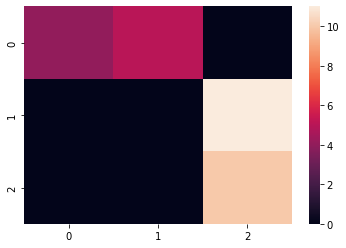

In [44]:
sns.heatmap(cm)

In [45]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [82]:
new_data = [5.1,3.5,1.4,0.2]

In [84]:
new_data_scaled = scaler.fit_transform([new_data])

In [85]:
new_data_reshaped = new_data_scaled.reshape(1, -1)

In [87]:
prediction = model.predict(new_data_reshaped)
predicted_class = prediction[0]
iris_species = data["species"].unique()[predicted_class]  # Get species name from unique labels
print("Predicted class:", predicted_class)
print("Predicted Iris species:", iris_species)

InvalidArgumentError: Graph execution error:

Detected at node sequential_1/dense_3/Relu defined at (most recent call last):
  File "F:\conda\lib\runpy.py", line 197, in _run_module_as_main

  File "F:\conda\lib\runpy.py", line 87, in _run_code

  File "F:\conda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>

  File "F:\conda\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance

  File "F:\conda\lib\site-packages\ipykernel\kernelapp.py", line 677, in start

  File "F:\conda\lib\site-packages\tornado\platform\asyncio.py", line 199, in start

  File "F:\conda\lib\asyncio\base_events.py", line 601, in run_forever

  File "F:\conda\lib\asyncio\base_events.py", line 1905, in _run_once

  File "F:\conda\lib\asyncio\events.py", line 80, in _run

  File "F:\conda\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue

  File "F:\conda\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one

  File "F:\conda\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell

  File "F:\conda\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request

  File "F:\conda\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute

  File "F:\conda\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell

  File "F:\conda\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell

  File "F:\conda\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell

  File "F:\conda\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "F:\conda\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async

  File "F:\conda\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes

  File "F:\conda\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code

  File "C:\Users\Anonymous\AppData\Local\Temp\ipykernel_1932\1516233759.py", line 1, in <cell line: 1>

  File "F:\conda\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "F:\conda\lib\site-packages\keras\src\engine\training.py", line 2655, in predict

  File "F:\conda\lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function

  File "F:\conda\lib\site-packages\keras\src\engine\training.py", line 2425, in step_function

  File "F:\conda\lib\site-packages\keras\src\engine\training.py", line 2413, in run_step

  File "F:\conda\lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step

  File "F:\conda\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "F:\conda\lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "F:\conda\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "F:\conda\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "F:\conda\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "F:\conda\lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "F:\conda\lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "F:\conda\lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "F:\conda\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "F:\conda\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "F:\conda\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "F:\conda\lib\site-packages\keras\src\layers\core\dense.py", line 255, in call

  File "F:\conda\lib\site-packages\keras\src\activations.py", line 306, in relu

  File "F:\conda\lib\site-packages\keras\src\backend.py", line 5395, in relu

Matrix size-incompatible: In[0]: [1,4], In[1]: [5,4]
	 [[{{node sequential_1/dense_3/Relu}}]] [Op:__inference_predict_function_18484]